# Ploynomial Regression with Turi Create

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # so that random values are always repeated
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Defining dataset

original polynom is $-x^2 + 1$

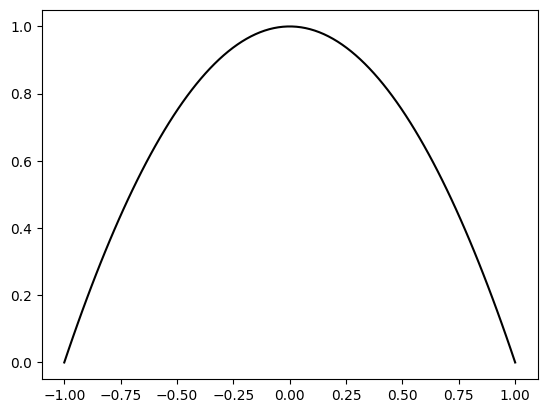

In [2]:
coefs = [1, 0, -1] # the coefficients at x^0, x^1, x^2

# calculate y for input x
def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i] * x ** i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 100)
    plt.plot(x, polynomial(coefs = coefs, x = x), linestyle = '-', color = 'black')

draw_polynomial(coefs)

## Creating dataset close to this polynomial

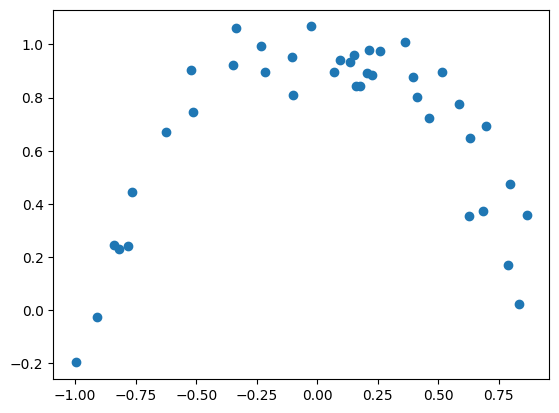

In [ ]:
X = [] # x - general features
Y = []
for i in range(40):
    x = random.uniform(-1, 1) # for float generating instead of an integer
    y = polynomial(coefs, x) + random.gauss(0, 0.1) # generate noise with gaussian distribution
    X.append(x)
    Y.append(y)
    
plt.scatter(X, Y)

## Creating table with different degrees of x in X for realization polynomial regression

In [27]:
data = pd.DataFrame({'x': X, 'y': Y})

degrees = range(2, 200)
new_columns = {f'x^{degree}' : [x ** degree for x in X] for degree in degrees}

# combining in one step (pd.concat)
data = pd.concat([data, pd.DataFrame(new_columns)], axis = 1) 
#  axis = 1 - for combining columns, not rows

In [28]:
show = ['x', 'y'] + [f'x^{d}' for d in range(2, 6)]
print(data[show].head())

          x         y       x^2       x^3       x^4       x^5
0 -0.997714 -0.196365  0.995434 -0.993159  0.990889 -0.988624
1 -0.512178  0.745786  0.262327 -0.134358  0.068815 -0.035246
2 -0.349591  0.922505  0.122214 -0.042725  0.014936 -0.005222
3  0.135021  0.934430  0.018231  0.002462  0.000332  0.000045
4 -0.522768  0.903280  0.273287 -0.142865  0.074686 -0.039043


## Divide dataset into train and test

In [31]:
train, test = train_test_split(data, test_size = 0.2, random_state = 52) # 80% for trainig, 20% for testing
# 52 doesn't have math background, it's just a random num for reproducibility of results